# TSQVT ρ-Higgs Portal: Parameter Space Scan

**Notebook 01:** Full (Λ, m_ρ) parameter space scan

This notebook performs a complete scan of the viable parameter space.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys
sys.path.insert(0, '../src')

from tsqvt_pipeline import TSQVTParameters, scan_parameter_space, compute_benchmark

plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['figure.dpi'] = 120

## 1. Initialize Spectral Parameters

In [2]:
params = TSQVTParameters()
print(f"Portal coefficient α₁ = {params.alpha1:.4e}")
print(f"Enhancement factor κ_spec = {params.kappa_spec:.2e}")
print(f"Critical condensation ρ_c = {params.rho_c:.4f}")

Portal coefficient α₁ = 4.2750e-02
Enhancement factor κ_spec = 5.00e+04
Critical condensation ρ_c = 0.6667


## 2. Run Parameter Scan

In [3]:
Lambda_range = (1000, 5000)
m_rho_range = (1500, 5000)
n_grid = 50

results = scan_parameter_space(Lambda_range, m_rho_range, params=params, n_Lambda=n_grid, n_m_rho=n_grid)
print(f"Viable points: {np.sum(results['viable'])} / {n_grid**2}")

Viable points: 841 / 2500


## 3. Visualize Δκ Contours

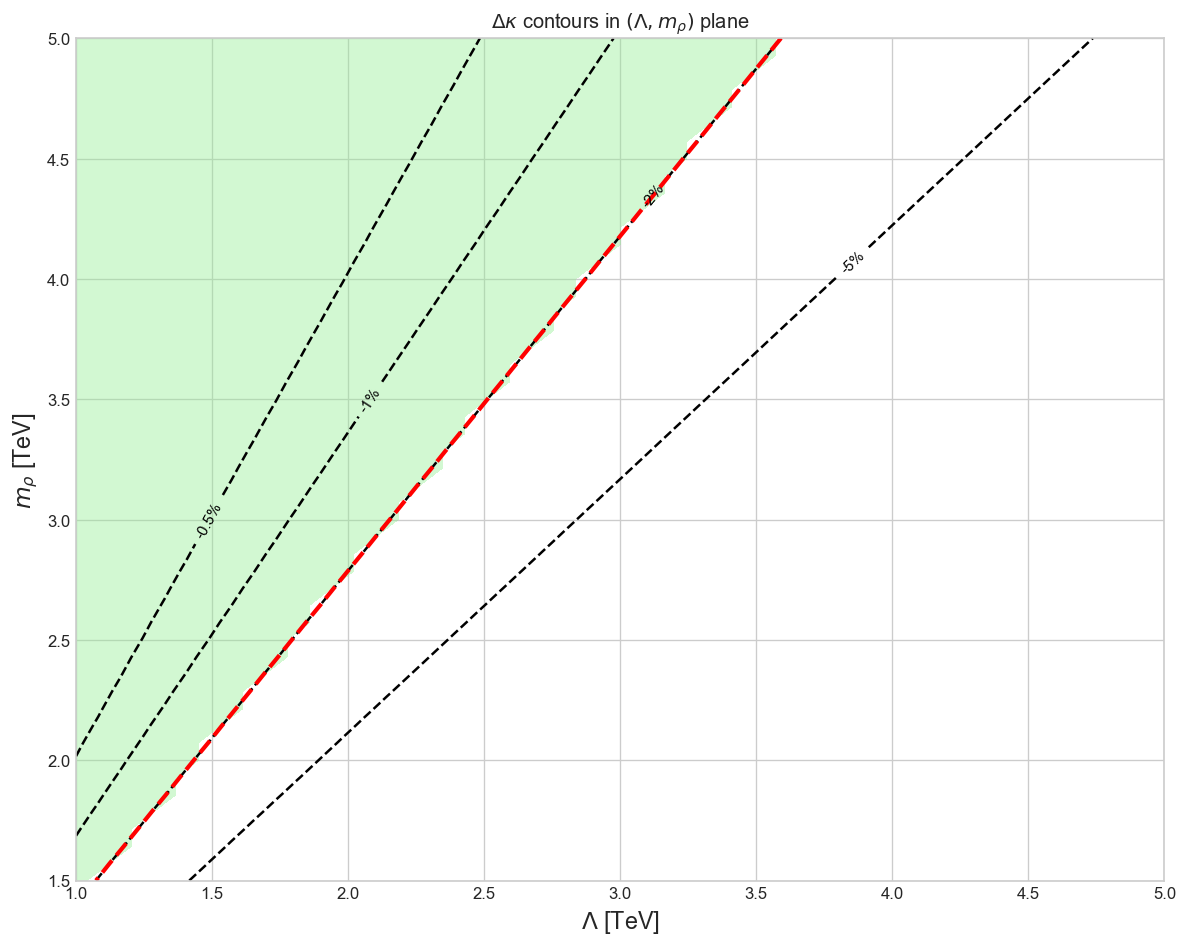

In [4]:
Lambda_grid, m_rho_grid = np.meshgrid(results['Lambda'], results['m_rho'])

fig, ax = plt.subplots(figsize=(10, 8))
levels = [-5, -2, -1, -0.5, 0.5, 1, 2, 5]
cs = ax.contour(Lambda_grid/1000, m_rho_grid/1000, results['Delta_kappa_percent'].T, levels=levels, colors='black')
ax.clabel(cs, fmt='%g%%', fontsize=9)
ax.contourf(Lambda_grid/1000, m_rho_grid/1000, results['viable'].T.astype(float), levels=[0.5, 1.5], colors=['lightgreen'], alpha=0.4)
ax.contour(Lambda_grid/1000, m_rho_grid/1000, np.abs(results['Delta_kappa_percent'].T), levels=[2.0], colors='red', linewidths=2.5, linestyles='--')
ax.set_xlabel(r'$\Lambda$ [TeV]', fontsize=14)
ax.set_ylabel(r'$m_\rho$ [TeV]', fontsize=14)
ax.set_title(r'$\Delta\kappa$ contours in $(\Lambda, m_\rho)$ plane')
plt.tight_layout()
plt.show()

## 4. Find Optimal Points

In [5]:
df = pd.DataFrame({
    'Lambda_GeV': Lambda_grid.flatten(),
    'm_rho_GeV': m_rho_grid.flatten(),
    'Delta_kappa_pct': results['Delta_kappa_percent'].T.flatten(),
    'sigma_x_BR_WW_fb': results['sigma_x_BR_WW'].T.flatten(),
    'viable': results['viable'].T.flatten()
})

viable_df = df[df['viable']].sort_values('sigma_x_BR_WW_fb', ascending=False)
print("Top 10 points by σ×BR(WW):")
print(viable_df.head(10).to_string(index=False))

Top 10 points by σ×BR(WW):
 Lambda_GeV   m_rho_GeV  Delta_kappa_pct  sigma_x_BR_WW_fb  viable
1000.000000 1500.000000        -1.544625          5.110987    True
1081.632653 1571.428571        -1.733648          4.700246    True
1000.000000 1571.428571        -1.299204          4.577629    True
1163.265306 1642.857143        -1.918285          4.335882    True
1081.632653 1642.857143        -1.472095          4.224572    True
1000.000000 1642.857143        -1.099014          4.132030    True
1163.265306 1714.285714        -1.642992          3.910318    True
1081.632653 1714.285714        -1.256142          3.825045    True
1000.000000 1714.285714        -0.934846          3.754629    True
1244.897959 1785.714286        -1.810817          3.629187    True


## 5. Save Results

In [6]:
df.to_csv('../data/scan_results.csv', index=False)
np.savez_compressed('../data/scan_results.npz', **results)
print("Results saved!")

Results saved!
